In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from config import weather_api_key

# Used to convert date
from datetime import datetime

In [2]:
# url for openweathermap
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)

# Pack latitudes and longitudes as pairs by zipping them
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | batsfjord
Processing Record 3 of Set 1 | pevek
Processing Record 4 of Set 1 | callaguip
Processing Record 5 of Set 1 | progreso
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | tawang
Processing Record 8 of Set 1 | tombouctou
Processing Record 9 of Set 1 | provideniya
Processing Record 10 of Set 1 | eufaula
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | hanchuan
Processing Record 14 of Set 1 | belmonte
Processing Record 15 of Set 1 | boa vista
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | vila velha
Processing Record 20 of Set 1 | richards bay
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | port alfr

Processing Record 39 of Set 4 | san policarpo
Processing Record 40 of Set 4 | hanzhong
Processing Record 41 of Set 4 | lavrentiya
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | faya
Processing Record 44 of Set 4 | srednekolymsk
Processing Record 45 of Set 4 | faanui
Processing Record 46 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 47 of Set 4 | saint george
Processing Record 48 of Set 4 | zhenhai
Processing Record 49 of Set 4 | bose
Processing Record 50 of Set 4 | codrington
Processing Record 1 of Set 5 | ambilobe
Processing Record 2 of Set 5 | bengkulu
Processing Record 3 of Set 5 | scottsbluff
Processing Record 4 of Set 5 | narsaq
Processing Record 5 of Set 5 | leningradskiy
Processing Record 6 of Set 5 | carnarvon
Processing Record 7 of Set 5 | bull savanna
Processing Record 8 of Set 5 | ust-nera
Processing Record 9 of Set 5 | mutoko
Processing Record 10 of Set 5 | kadykchan
City not found. Skipping...
Processing Record 11 of Set 5 | so

Processing Record 25 of Set 8 | hambantota
Processing Record 26 of Set 8 | soubre
Processing Record 27 of Set 8 | wadi maliz
Processing Record 28 of Set 8 | nishihara
Processing Record 29 of Set 8 | troitsko-pechorsk
Processing Record 30 of Set 8 | karratha
Processing Record 31 of Set 8 | aban
Processing Record 32 of Set 8 | banfora
Processing Record 33 of Set 8 | ust-shonosha
Processing Record 34 of Set 8 | melgar
Processing Record 35 of Set 8 | glenwood springs
Processing Record 36 of Set 8 | bolshaya chernigovka
City not found. Skipping...
Processing Record 37 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 38 of Set 8 | palmer
Processing Record 39 of Set 8 | pringsewu
Processing Record 40 of Set 8 | bollnas
Processing Record 41 of Set 8 | ilulissat
Processing Record 42 of Set 8 | dakar
Processing Record 43 of Set 8 | santa maria
Processing Record 44 of Set 8 | orcopampa
Processing Record 45 of Set 8 | buala
Processing Record 46 of Set 8 | banjar
Processing Record 

Processing Record 14 of Set 12 | santa eulalia del rio
City not found. Skipping...
Processing Record 15 of Set 12 | navahrudak
Processing Record 16 of Set 12 | antofagasta
Processing Record 17 of Set 12 | kuldur
Processing Record 18 of Set 12 | kalaleh
Processing Record 19 of Set 12 | miracema do tocantins
Processing Record 20 of Set 12 | mrganush
Processing Record 21 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 22 of Set 12 | north myrtle beach
Processing Record 23 of Set 12 | wukari
Processing Record 24 of Set 12 | natal
Processing Record 25 of Set 12 | colares
Processing Record 26 of Set 12 | ternate
Processing Record 27 of Set 12 | kumbo
Processing Record 28 of Set 12 | altay
Processing Record 29 of Set 12 | ancud
Processing Record 30 of Set 12 | plastun
Processing Record 31 of Set 12 | marsa matruh
Processing Record 32 of Set 12 | jibuti
Processing Record 33 of Set 12 | mackay
Processing Record 34 of Set 12 | san quintin
Processing Record 35 of Set 12 | many

In [7]:
len(city_data)

553

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,75.78,78,58,3.18,US,2021-06-04 23:52:13
1,Batsfjord,70.6345,29.7185,47.61,87,77,8.77,NO,2021-06-04 23:51:46
2,Pevek,69.7008,170.3133,38.41,89,100,7.70,RU,2021-06-04 23:52:13
3,Callaguip,18.0714,120.4867,80.62,83,90,14.72,PH,2021-06-04 23:52:13
4,Progreso,21.2833,-89.6667,85.10,76,63,16.20,MX,2021-06-04 23:52:14
5,East London,-33.0153,27.9116,54.48,57,4,7.36,ZA,2021-06-04 23:49:12
6,Tawang,27.5833,91.8667,54.14,87,63,0.81,IN,2021-06-04 23:52:14
7,Tombouctou,20.0000,-3.0000,94.10,13,55,9.37,ML,2021-06-04 23:52:14
8,Provideniya,64.3833,-173.3000,39.52,61,61,8.50,RU,2021-06-04 23:52:15
9,Eufaula,31.8913,-85.1455,80.64,78,40,4.61,US,2021-06-04 23:52:15


In [9]:
print(city_data_df.columns)

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


In [10]:
# Reordering the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-06-04 23:52:13,42.6001,-73.9662,75.78,78,58,3.18
1,Batsfjord,NO,2021-06-04 23:51:46,70.6345,29.7185,47.61,87,77,8.77
2,Pevek,RU,2021-06-04 23:52:13,69.7008,170.3133,38.41,89,100,7.70
3,Callaguip,PH,2021-06-04 23:52:13,18.0714,120.4867,80.62,83,90,14.72
4,Progreso,MX,2021-06-04 23:52:14,21.2833,-89.6667,85.10,76,63,16.20
5,East London,ZA,2021-06-04 23:49:12,-33.0153,27.9116,54.48,57,4,7.36
6,Tawang,IN,2021-06-04 23:52:14,27.5833,91.8667,54.14,87,63,0.81
7,Tombouctou,ML,2021-06-04 23:52:14,20.0000,-3.0000,94.10,13,55,9.37
8,Provideniya,RU,2021-06-04 23:52:15,64.3833,-173.3000,39.52,61,61,8.50
9,Eufaula,US,2021-06-04 23:52:15,31.8913,-85.1455,80.64,78,40,4.61


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

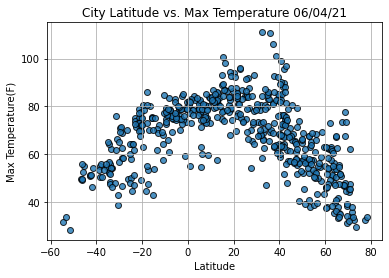

In [13]:
# Import time module
import time

# Build the scatter plot for latitide vs. max temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/lat_vs_maxTemp.png")

# Show plot
plt.show()

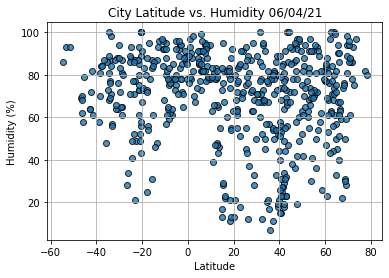

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_vs_humidity.png")

# Show plot.
plt.show()

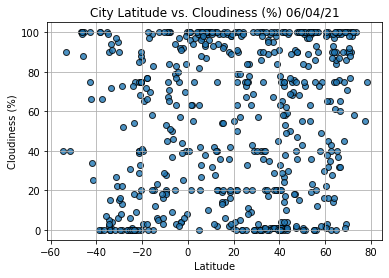

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_vs_cloudiness.png")

# Show plot.
plt.show()

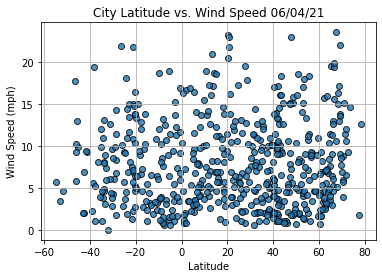

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_vs_windSpeed.png")

# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the test for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
    print(f"The r value is {r_value:.2f}")

In [18]:
index13 = city_data_df.loc[13]
index13

City                     Belmonte
Country                        BR
Date          2021-06-04 23:52:16
Lat                      -15.8631
Lng                      -38.8828
Max Temp                     75.7
Humidity                       87
Cloudiness                     99
Wind Speed                   10.2
Name: 13, dtype: object

In [19]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

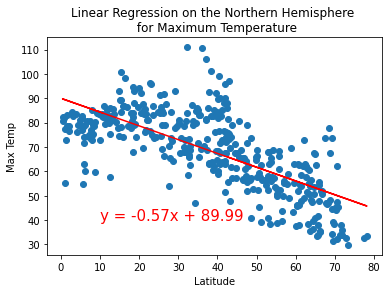

The r value is -0.71


In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',
                       (10,40))

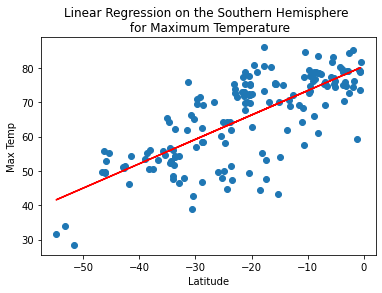

The r value is 0.74


In [21]:
# Linear regression on the Southrn Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',
                       (-50,90))

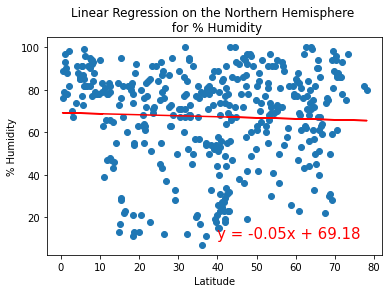

The r value is -0.04


In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

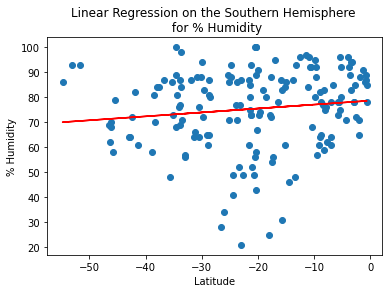

The r value is 0.13


In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

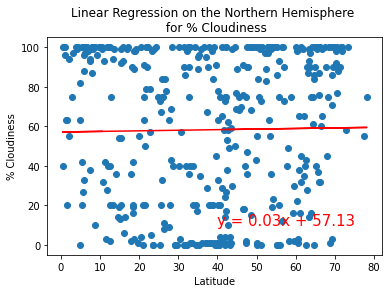

The r value is 0.02


In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

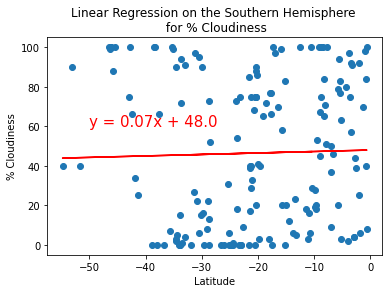

The r value is 0.03


In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

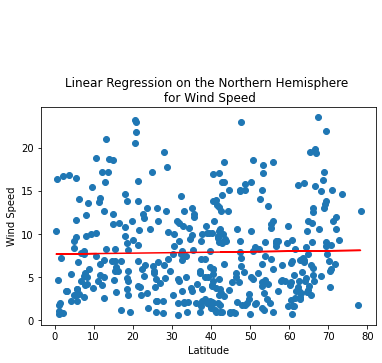

The r value is 0.02


In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

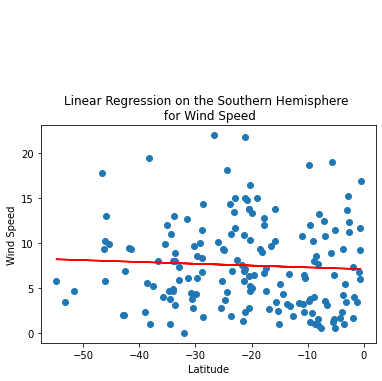

The r value is -0.05


In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))